In [21]:
import statsmodels.api as sm
import pandas   as pd
import numpy    as np
import matplotlib.pyplot as plt

url_datos = "https://raw.githubusercontent.com/NechuBM/dataset/main/precios_casa.txt"
df = pd.read_csv(url_datos, delimiter=';')

In [38]:
# Exploración de los datos
print(df.columns)
print(df.head())
print(df.describe())

Index(['tamano', 'antiguedad', 'barrio', 'precio', 'intercept'], dtype='object')
    tamano  antiguedad barrio  precio  intercept
0  115.336          63      E   271.5          1
1  132.597          66      E   300.0          1
2  234.558          17      N   509.8          1
3  209.916          39      N   394.0          1
4  212.105          15      N   540.0          1
           tamano  antiguedad      precio  intercept
count  100.000000  100.000000  100.000000      100.0
mean   160.623310   40.140000  362.239520        1.0
std     48.678464   27.092442  104.595007        0.0
min     88.988000   11.000000  158.000000        1.0
25%    123.055750   18.000000  287.228000        1.0
50%    158.429500   26.500000  352.900000        1.0
75%    189.033000   59.000000  426.245000        1.0
max    375.025000  113.000000  718.200000        1.0


In [41]:
# definimos los valores de entrada y de salida
df['intercept'] = 1
# X = df[['intercept', 'tamano']]
X = df.tamano
Y = df.precio
Z = df.antiguedad
Z1 = df.barrio

In [40]:
df.describe()

,tamano,antiguedad,precio,intercept
count,100.000000,100.000000,100.000000,100.0
mean,160.623310,40.140000,362.239520,1.0
std,48.678464,27.092442,104.595007,0.0
min,88.988000,11.000000,158.000000,1.0
25%,123.055750,18.000000,287.228000,1.0
50%,158.429500,26.500000,352.900000,1.0
75%,189.033000,59.000000,426.245000,1.0
max,375.025000,113.000000,718.200000,1.0


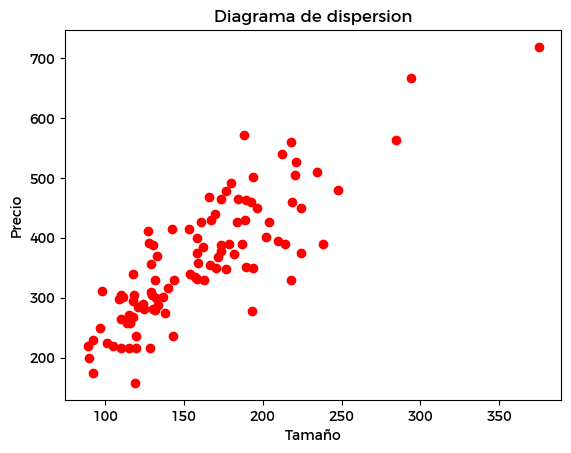

In [42]:
plt.title('Diagrama de dispersion')
plt.xlabel('Tamaño')
plt.ylabel('Precio')
plt.scatter(X, Y, c='red', label='Datos')
plt.show()

In [43]:
def crear_linea(b0, b1):
    '''Crea una linea a partir de la pendiente y la intersección'''
    x_l = [0, 400]
    y_l = [b0 + b1*x for x in x_l]

    return x_l, y_l


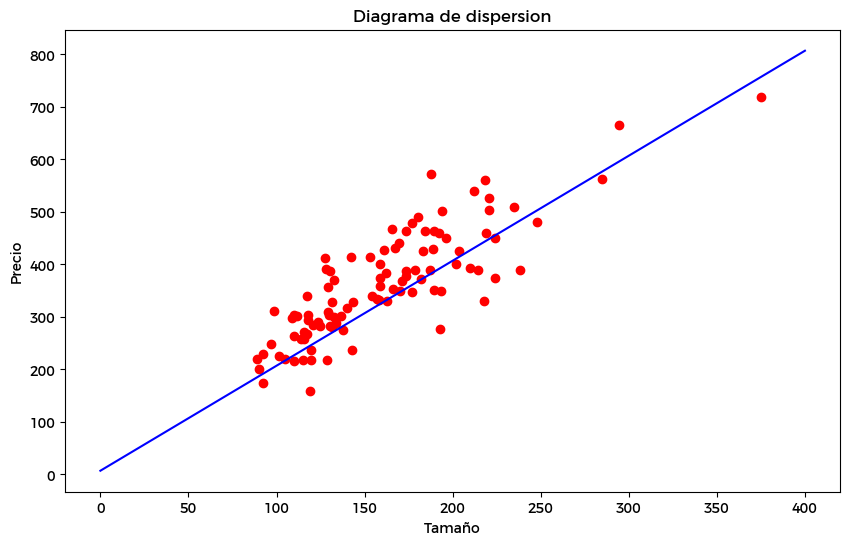

In [44]:
b0 = 7  # interseccion
b1 = 2  # pendiente

x_l, y_l = crear_linea(b0, b1)

plt.figure(figsize=(10,6))
plt.title('Diagrama de dispersion')
plt.xlabel('Tamaño')
plt.ylabel('Precio')
plt.scatter(X, Y, c='red', label='Datos')
plt.plot(x_l, y_l, c='blue')
plt.show()

In [28]:
# creamos nuestro modelo
# defino nuevamente los valores de X y Y porque hay que agregar la columna de intersección
X = df[['intercept', 'tamano']] 
Y = df.precio    

# Ajustamos el modelo de regresión lineal
lm = sm.OLS(Y,X)
results = lm.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     235.7
Date:                Thu, 07 Aug 2025   Prob (F-statistic):           8.08e-28
Time:                        23:11:01   Log-Likelihood:                -545.14
No. Observations:                 100   AIC:                             1094.
Df Residuals:                      98   BIC:                             1099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     72.1898     19.735      3.658      0.0

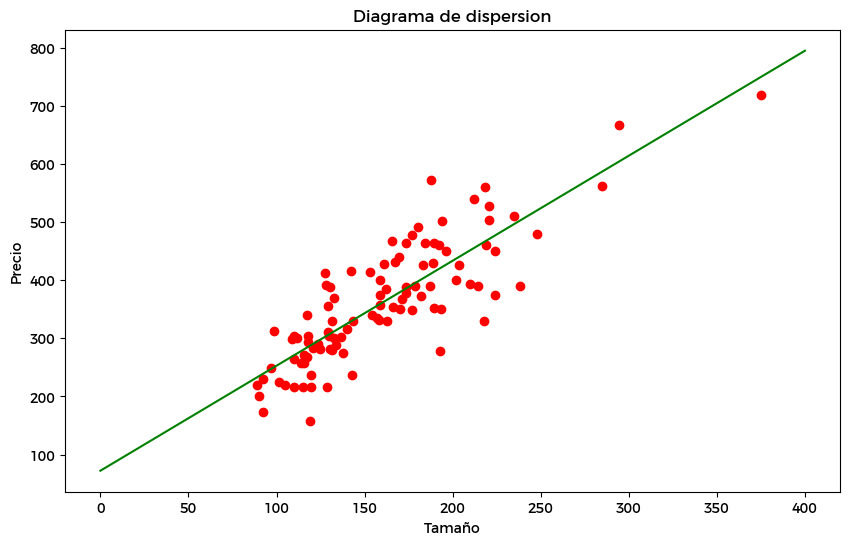

In [45]:
#para graficar la recta de regresión hay que definir nuevamente los valores de b0 y b1 

#Para esto tomo los datos del modelo de regresión creado 
b0 = results.params['intercept']  # intersección
b1 = results.params['tamano']  # pendiente


x_l, y_l = crear_linea(b0, b1)

plt.figure(figsize=(10,6))
plt.title('Diagrama de dispersion')
plt.xlabel('Tamaño')
plt.ylabel('Precio')
plt.scatter(X, Y, c='red', label='Datos')
plt.plot(x_l, y_l, c='green')
plt.show()

Precio estimado para tamaño 350: 704.21


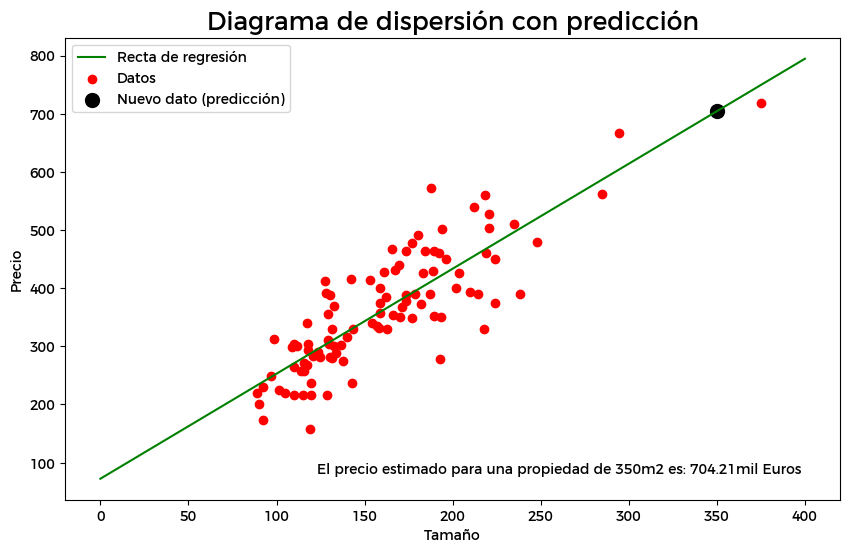

In [46]:
# Nuevo dato
Area = 350

DatoNuevo = pd.DataFrame({'intercept': [1], 'tamano': Area})
pred = results.predict(DatoNuevo)[0]
print(f"Precio estimado para tamaño {DatoNuevo['tamano'][0]}: {pred:.2f}")

# Graficar
plt.rcParams['font.family'] = 'Montserrat' 
plt.figure(figsize=(10,6))
plt.title('Diagrama de dispersión con predicción', fontsize=18, color="black",fontweight='bold')
plt.xlabel('Tamaño', fontstyle='oblique')
plt.ylabel('Precio', fontstyle='italic')

# Poner Recta de regresión en la grafica
plt.plot(x_l, y_l, c='green', label='Recta de regresión')

# Poner puntos en la gradica
plt.scatter(X, Y, c='red', label='Datos')
plt.scatter(DatoNuevo['tamano'], pred, c='Black', s=100, label='Nuevo dato (predicción)', edgecolors='black')

plt.text(
    0.95, 0.05,                      # 95% a la derecha, 5% arriba del eje X
    f"El precio estimado para una propiedad de {DatoNuevo['tamano'][0]}m2 es: {pred:.2f}mil Euros",
    transform=plt.gca().transAxes,   # usa coordenadas relativas (0-1)
    fontsize=10,
    color='black',
    ha='right',
    va='bottom'
)

plt.legend()
plt.show()